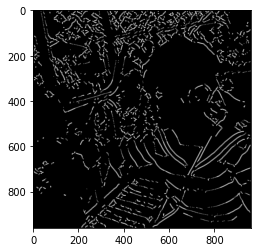

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
def angle(alpha,Gy,Gx):
  for x in range(0,960):
    for y in range(0,960):
      if(-180<=(math.atan2(Gy[x,y],Gx[x,y]))*180/pi<=-90):
        alpha[x,y]=-124-1.4*(math.atan2(Gy[x,y],Gx[x,y]))*180/pi
      elif(-90<(math.atan2(Gy[x,y],Gx[x,y]))*180/pi<0):
        alpha[x,y]=128+1.4*(math.atan2(Gy[x,y],Gx[x,y]))*180/pi
      elif(0<=(math.atan2(Gy[x,y],Gx[x,y]))*180/pi<=90):
        alpha[x,y]=128+1.4*(math.atan2(Gy[x,y],Gx[x,y]))*180/pi
      else:
        alpha[x,y]=381-1.4*(math.atan2(Gy[x,y],Gx[x,y]))*180/pi
  return alpha
def Doublethreshold(gn,gnh,gnl):
  gnh=gn if (gn>=0.1) else 0
  gn1=gn if (0.1>gn>=0.04) else 0
  return (gnh,gnl)
def nonmaxsuppression(Ms,Gy,Gx,gn,gnh,gnl):
  for m in range(1,959):
    for n in range(1,959):
      if(-22.5<=(math.atan2(Gy[m,n],Gx[m,n]))*180/pi<=22.5 or -180<=(math.atan2(Gy[m,n],Gx[m,n]))*180/pi<=-157.5 
        or 157.5<=(math.atan2(Gy[m,n],Gx[m,n]))*180/pi<=180):
        gn[m,n]=0 if (Ms[m,n]<Ms[m-1,n] or Ms[m,n]<Ms[m+1,n]) else Ms[m,n]
        (gnh[m,n],gnl[m,n])=Doublethreshold(gn[m,n],gnh[m,n],gnl[m,n])
      elif(-157.5<(math.atan2(Gy[m,n],Gx[m,n]))*180/pi<-112.5 or 22.5<(math.atan2(Gy[m,n],Gx[m,n]))*180/pi<67.5):
        gn[m,n]=0 if (Ms[m,n]<Ms[m-1,n-1] or Ms[m,n]<Ms[m+1,n+1]) else Ms[m,n]
        (gnh[m,n],gnl[m,n])=Doublethreshold(gn[m,n],gnh[m,n],gnl[m,n])
      elif(-112.5<=(math.atan2(Gy[m,n],Gx[m,n]))*180/pi<=-67.5 or 67.5<=(math.atan2(Gy[m,n],Gx[m,n]))*180/pi<=112.5):
        gn[m,n]=0 if (Ms[m,n]<Ms[m,n-1] or Ms[m,n]<Ms[m,n+1]) else Ms[m,n]
        (gnh[m,n],gnl[m,n])=Doublethreshold(gn[m,n],gnh[m,n],gnl[m,n])
      else:
        gn[m,n]=0 if (Ms[m,n]<Ms[m+1,n-1] or Ms[m,n]<Ms[m-1,n+1]) else Ms[m,n]
        (gnh[m,n],gnl[m,n])=Doublethreshold(gn[m,n],gnh[m,n],gnl[m,n])
  return (gn,gnh,gnl)
def Hysteresisthresholding(e,gnh,gnl):
  for a in range(1,959):
    for b in range(1,959):
      flag=1
      while(flag and gnh[a,b]!=0):
        e[a,b]=1
        for v in range(-1,2):
          for k in range(-1,2):
            if(v!=0 and k!=0):
              e[a+v,b+k]=1 if (gnh[a+v,b+k]==gnl[a+v,b+k]) else 0
            else:
              e[a+v,b+k]=e[a+v,b+k]
        flag=0
  return e
pi=math.pi
img=cv2.imread("/content/drive/MyDrive/DIPproject5/Kid at playground.tif",cv2.IMREAD_GRAYSCALE)
img=np.float32(img)/255
alpha=np.copy(img)
gn=np.zeros((960,960))
gnh=np.zeros((960,960))
gnl=np.zeros((960,960))
e=np.zeros((960,960))
fs=cv2.GaussianBlur(img,(31,31),5)
Gx=cv2.Sobel(fs,cv2.CV_32F,1,0)
Gy=cv2.Sobel(fs,cv2.CV_32F,0,1)
gx=np.square(np.copy(Gx))
gy=np.square(np.copy(Gy))
Ms=np.sqrt(cv2.add(gx,gy))
alpha=angle(alpha,Gy,Gx)
(gn,gnh,gnl)=nonmaxsuppression(Ms,Gy,Gx,gn,gnh,gnl)
e=Hysteresisthresholding(e,gnh,gnl)
plt.imshow(e,cmap="gray")
plt.savefig('/content/drive/MyDrive/DIPproject5/e.png',dpi =200)